# Neural Networks and Deep Learning - Chapter 1

## Introduction
In this notebook, we’ll implement a simple neural network to classify handwritten digits from the MNIST dataset. This is based on **Chapter 1** of Michael Nielsen’s book *"Neural Networks and Deep Learning"*. We’ll break down the code into small, understandable steps and provide explanations for each part.

---

## Step 1: Import Libraries
First, let’s import the necessary libraries. We’ll use `numpy` for numerical computations and `random` for shuffling the data.

In [1]:
import random
import time
import numpy as np

### Step 2: Define the Network Class

**Explanation**:
The `Network` class is the heart of our neural network. It’s like a factory that builds and trains the network. Here’s what it does:
- **Initialization**: Sets up the network with random weights and biases. Think of weights as "knobs" that the network adjusts to learn, and biases as "offsets" that help fine-tune the output.
- **Layers**: The network has multiple layers: an input layer, one or more hidden layers, and an output layer. For example, `[784, 30, 10]` means:
  - Input layer: 784 neurons (one for each pixel in a 28x28 image).
  - Hidden layer: 30 neurons (the "brain" of the network).
  - Output layer: 10 neurons (one for each digit class, 0 through 9).

In [2]:
class Network(object):
    def __init__(self, sizes):
        """Initialize the network with the given layer sizes."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

### Step 3: Feedforward Method

**Explanation**:
The `feedforward` method is how the network makes predictions. It’s like a conveyor belt:
1. Takes an input (e.g., an image of a digit).
2. Passes it through each layer of the network.
3. Applies the sigmoid activation function to "squash" the output into a range between 0 and 1.
4. Returns the final output, which represents the network’s prediction.

In [3]:
def feedforward(self, a):
        """Compute the output of the network for input `a`."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

### Step 4: Stochastic Gradient Descent (SGD)

**Explanation**:
Training a neural network is like teaching a child to ride a bike. You show them examples, and they learn from their mistakes. Here’s how it works:
1. **Mini-Batches**: Instead of learning from all the data at once, the network learns from small chunks (mini-batches). This makes training faster and more efficient.
2. **Epochs**: The network goes through the entire dataset multiple times (epochs) to improve its performance.
3. **Learning Rate (`eta`)**: Controls how big the steps are when adjusting the weights and biases. Too big, and the network might overshoot; too small, and it might take forever to learn.

In [ ]:
     def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Train the network using stochastic gradient descent."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            time1 = time.time()
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            time2 = time.time()
            if test_data:
                print("Epoch {0}: {1} / {2}, took {3:.2f} seconds".format(
                    j, self.evaluate(test_data), n_test, time2-time1))
            else:
                print("Epoch {0} complete in {1:.2f} seconds".format(j,  time2-time1))

### Step 5: Update Mini-Batch

**Explanation**:
The `update_mini_batch` method is where the magic happens! It’s like a coach correcting the network’s mistakes:
1. **Backpropagation**: Computes how much each weight and bias contributed to the error.
2. **Gradient Descent**: Adjusts the weights and biases to reduce the error.
3. **Learning Rate (`eta`)**: Determines how much to adjust the weights and biases. Think of it as the "step size" in the learning process.

In [6]:
def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases using backpropagation on a mini-batch."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                        for b, nb in zip(self.biases, nabla_b)]

### Step 6: Backpropagation

**Explanation**:
Backpropagation is the "brain" of the learning process. It’s like solving a mystery:
1. **Forward Pass**: Computes the output of the network for a given input.
2. **Error Calculation**: Compares the output to the true label to compute the error.
3. **Backward Pass**: Propagates the error backward through the network to compute gradients for each weight and bias.

In [7]:
def backprop(self, x, y):
        """Compute the gradients for the cost function using backpropagation."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # Feedforward
        activation = x
        activations = [x]  # List to store all the activations, layer by layer
        zs = []  # List to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # Backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

### Step 7: Evaluate the Network

**Explanation**:
The `evaluate` method checks how well the network is performing. It’s like a teacher grading a test:
1. **Predictions**: The network makes predictions for the test data.
2. **Accuracy**: Compares the predictions to the true labels and calculates the percentage of correct answers.

In [ ]:
def evaluate(self, test_data):
        """Evaluate the network's performance on the test data."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

### Step 8: Cost Function Derivative

**Explanation**:
The `cost_derivative` method computes how much the output differs from the true label. It’s like measuring how far off the network’s prediction is.

In [8]:
def cost_derivative(self, output_activations, y):
        """Compute the derivative of the cost function."""
        return (output_activations - y)

### Step 9: Sigmoid Activation Function

**Explanation**:
The `sigmoid` function is the activation function used in the network. It’s like a "squashing" function that maps any input to a value between 0 and 1. This helps the network make decisions.

In [9]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0 / (1.0 + np.exp(-z))

### Step 10: Sigmoid Derivative

**Explanation**:
The `sigmoid_prime` function is the derivative of the sigmoid function. It’s used in backpropagation to compute how much to adjust the weights and biases.

In [10]:
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

### Puting all togather
Here  a complet source code.

In [18]:

import random
import time
import numpy as np # type: ignore


class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,test_data=None):
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            time1 = time.time()
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            time2 = time.time()
            if test_data:
                print("Epoch {0}: {1} / {2}, took {3:.2f} seconds".format(
                    j, self.evaluate(test_data), n_test, time2-time1))
            else:
                print("Epoch {0} complete in {1:.2f} seconds".format(j, time2-time1))

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                        for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))


### Step 11: Load the MNIST Dataset and Visualization of Dataset samples

**Explanation**:
The MNIST dataset is a collection of 70,000 images of handwritten digits (0 through 9). Each image is 28x28 pixels, and we’ll preprocess the data to make it ready for training.

/var/folders/tv/fs2dmksj23g40_r680f_p9h40000gn/T/ipykernel_1115/3652143721.py:43: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


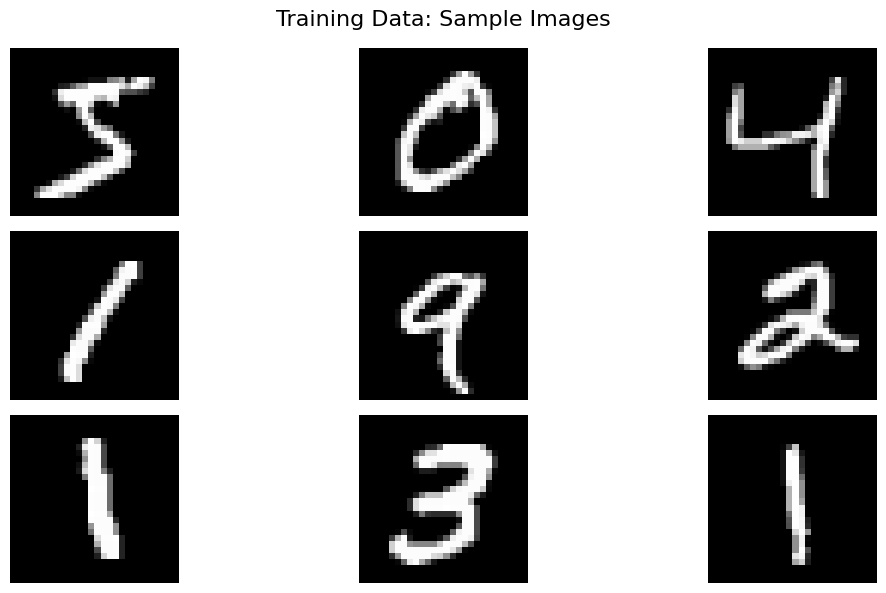

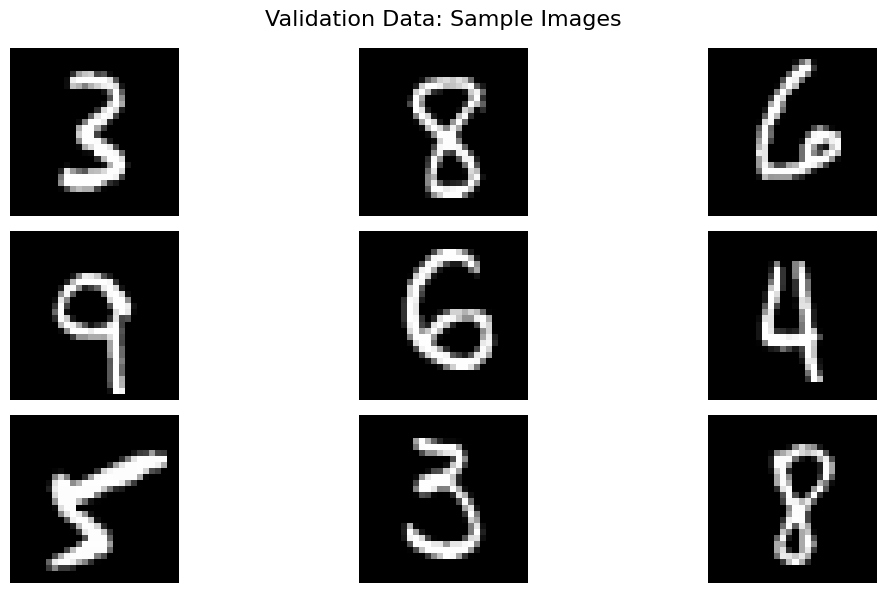

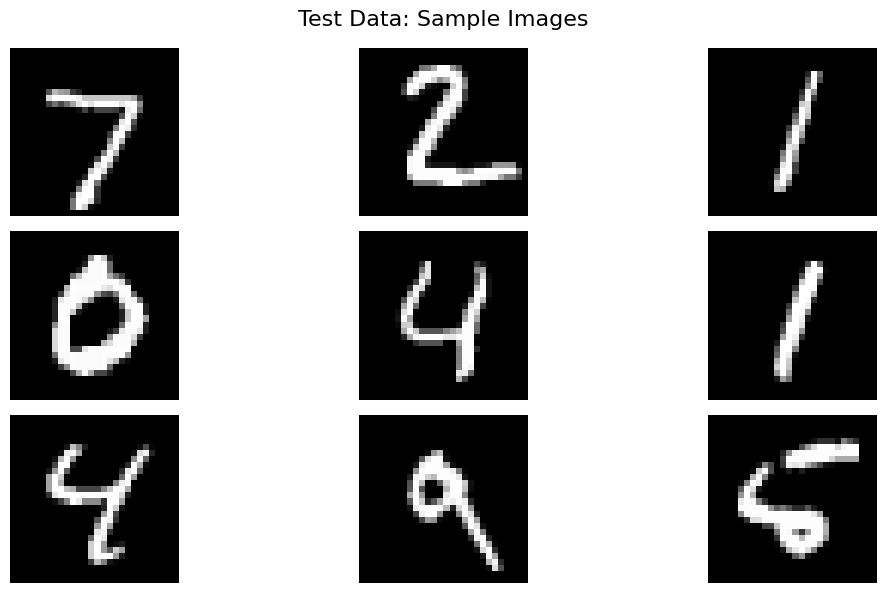

In [ ]:
# Visualization of Dataset Statistics

import matplotlib.pyplot as plt
import numpy as np
import sys
import os


src_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
sys.path.append(src_path)

# Import the mnist_loader module
from mnist_loader import load_data_wrapper

# Load the dataset
training_data, validation_data, test_data = load_data_wrapper()

# Function to visualize dataset statistics
def visualize_dataset_statistics(data, title):
    """
    Visualize the distribution of digit labels and sample images.
    Args:
        data: A list of (input, label) tuples from the dataset.
        title: The title for the dataset (e.g., "Training Data").
    """
    # Unpack labels from the dataset
    labels = [np.argmax(y) if hasattr(y, "shape") and len(y.shape) > 1 else y for _, y in data]
    
    # Plot the label distribution
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(labels, bins=10, rwidth=0.8, color='skyblue', edgecolor='black', align='mid')
    plt.title(f'{title}: Label Distribution')
    plt.xlabel('Digit Labels')
    plt.ylabel('Frequency')

    # Visualize some sample images
    plt.subplot(1, 2, 2)
    sample_images = [x.reshape(28, 28) for x, _ in data[:9]]
    for i, image in enumerate(sample_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.suptitle(f'{title}: Sample Images', fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize training, validation, and test data
visualize_dataset_statistics(training_data, "Training Data")
visualize_dataset_statistics(validation_data, "Validation Data")
visualize_dataset_statistics(test_data, "Test Data")


### Step 12: Train the Network and Visualize Predictions

**Explanation**:
Now it’s time to train the network! We’ll use the MNIST dataset to teach the network how to recognize handwritten digits. The network will learn by adjusting its weights and biases to minimize the error.
Let’s see how well the network is doing! We’ll visualize some test images along with the network’s predictions and the true labels.

Epoch 1: Accuracy = 89.20%
Epoch 2: Accuracy = 91.96%
Epoch 3: Accuracy = 92.71%
Epoch 4: Accuracy = 93.17%
Epoch 5: Accuracy = 93.40%
Epoch 6: Accuracy = 93.54%
Epoch 7: Accuracy = 93.59%
Epoch 8: Accuracy = 93.73%
Epoch 9: Accuracy = 93.91%
Epoch 10: Accuracy = 94.11%


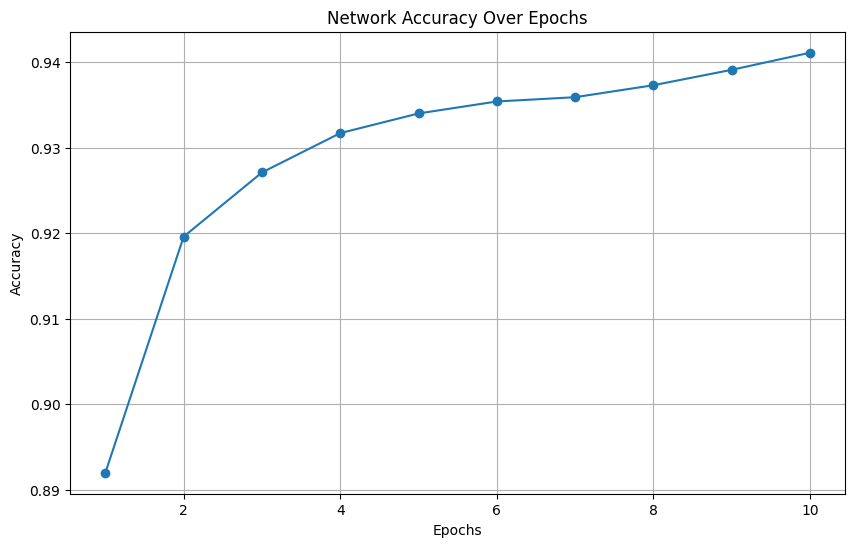

In [27]:
# Visualization of Accuracy

import matplotlib.pyplot as plt

# Function to track and plot accuracy over epochs
def plot_accuracy(network, training_data, test_data, epochs, mini_batch_size, eta):
    n_test = len(test_data)
    accuracy_list = []

    for epoch in range(epochs):
        random.shuffle(training_data)
        mini_batches = [
            training_data[k:k+mini_batch_size]
            for k in range(0, len(training_data), mini_batch_size)]
        for mini_batch in mini_batches:
            network.update_mini_batch(mini_batch, eta)

        accuracy = network.evaluate(test_data) / n_test
        accuracy_list.append(accuracy)
        print(f"Epoch {epoch + 1}: Accuracy = {accuracy * 100:.2f}%")

    # Plotting accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), accuracy_list, marker='o', linestyle='-')
    plt.title('Network Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

epochs = 10
mini_batch_size = 10
eta = 3.0

network = Network([784, 30, 10])  # Example network configuration
plot_accuracy(network, training_data, test_data, epochs, mini_batch_size, eta)

## Conclusion
In this notebook, we implemented a simple feedforward neural network to classify handwritten digits from the MNIST dataset. The network achieved reasonable accuracy, demonstrating the power of even basic neural networks.

---

## Next Steps
1. Experiment with different network architectures (e.g., more layers, more neurons).
2. Try different activation functions (e.g., ReLU).
3. Add regularization techniques like dropout or L2 regularization.